In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
%matplotlib inline

In [2]:
strike_df = pd.read_csv("work_stoppages-7b69492.csv")
strike_df

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Interstate Paper Converting Corp,USA 13058,NaN,1984AA00L294,NaN,NaN,Manufacturing,"Secaucus, NJ",27.0,2/25/84,3/15/84,NaN,NaN,NaN,NaN
1,"Wgbh Educational Foundation, Wgbh Tv",NABET 18,NaN,1984AA00L307,NaN,NaN,Information,"Boston, MA",600.0,2/9/84,2/9/84,NaN,NaN,NaN,NaN
2,Nielsen Lithographing Co,GCIU 508,NaN,1984AA00L324,NaN,NaN,Manufacturing,"Cincinnati, OH",29.0,1/25/84,7/19/84,NaN,NaN,NaN,NaN
3,Newark Metal Products,LIUNA 734,NaN,1984AA00L339,NaN,NaN,Manufacturing,"Kenilworth, NJ",15.0,11/28/83,3/27/84,NaN,NaN,NaN,NaN
4,Universal Construction Inc,IBT 492,NaN,1984AA00L359,NaN,NaN,Construction,"Albuquerque, NM",4.0,5/21/84,9/5/84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28629,Amita Health St. Joseph Medical Center,Illinois Nurses Association,NaN,2020N1801267,800.0,62.0,Health Care and Social Assistance,"Joliet, IL",780.0,7/4/20,7/22/20,19.0,NaN,NaN,NaN
28630,Infinity Healthcare Management of Illinois,SEIU Healthcare,NaN,2020N1801783,940.0,62.0,Health Care and Social Assistance,"Hillside, IL",940.0,11/23/20,NaN,9.0,NaN,NaN,NaN
28631,Johnson Controls Inc. - Test Lab,UAW 1872,NaN,2020N1802519,60.0,31.0,Manufacturing,"York, PA",60.0,9/28/20,NaN,98.0,NaN,NaN,NaN
28632,Gahanna Schools,OEA,NaN,2.02111E+11,570.0,61.0,Educational Services,"Gahanna, OH",6.0,10/13/20,10/18/20,6.0,NaN,NaN,NaN


In [3]:
strike_df['Start Date']= pd.to_datetime(strike_df['Start Date'])
strike_df['End Date']= pd.to_datetime(strike_df['End Date'])
strike_df.head()

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Interstate Paper Converting Corp,USA 13058,NaN,1984AA00L294,NaN,NaN,Manufacturing,"Secaucus, NJ",27.0,1984-02-25,1984-03-15,NaN,NaN,NaN,NaN
1,"Wgbh Educational Foundation, Wgbh Tv",NABET 18,NaN,1984AA00L307,NaN,NaN,Information,"Boston, MA",600.0,1984-02-09,1984-02-09,NaN,NaN,NaN,NaN
2,Nielsen Lithographing Co,GCIU 508,NaN,1984AA00L324,NaN,NaN,Manufacturing,"Cincinnati, OH",29.0,1984-01-25,1984-07-19,NaN,NaN,NaN,NaN
3,Newark Metal Products,LIUNA 734,NaN,1984AA00L339,NaN,NaN,Manufacturing,"Kenilworth, NJ",15.0,1983-11-28,1984-03-27,NaN,NaN,NaN,NaN
4,Universal Construction Inc,IBT 492,NaN,1984AA00L359,NaN,NaN,Construction,"Albuquerque, NM",4.0,1984-05-21,1984-09-05,NaN,NaN,NaN,NaN


In [4]:
strike_df['End Date']-strike_df['Start Date']
strike_df.loc[(strike_df['End Date']-strike_df['Start Date']).isna(), ['Start Date','End Date']]

,Start Date,End Date
1045,1985-06-27,NaT
1220,1985-03-11,NaT
6005,1990-03-01,NaT
6206,1990-10-14,NaT
6207,1990-10-14,NaT
...,...,...
28622,2020-10-26,NaT
28626,2020-12-16,NaT
28628,2020-08-23,NaT
28630,2020-11-23,NaT


In [5]:
strike_df.loc[strike_df['Employer']=="Youngstown State University",]['City, State'].unique()

array(['Youngstown, OH', ', '], dtype=object)

In [6]:
strike_df.loc[strike_df['City, State']==", ",]

,Employer,Union,Union Local,Case Number,BU,NAICS,Industry,"City, State",# Idled,Start Date,End Date,Duration,Unnamed: 12,Unnamed: 13,Unnamed: 14
12045,GLADMAN MENTAL HEALTH REHABILITATION CENTER,SEIU Local 250,NaN,2004IP002195,NaN,NaN,Health Care and Social Assistance,",",20.0,2005-06-20,2005-06-24,NaN,NaN,NaN,NaN
13593,Lawrence and Memorial Hospital,AFT Local 5049,NaN,2.01311E+11,NaN,NaN,Health Care and Social Assistance,",",525.0,2013-11-27,2013-12-19,NaN,NaN,NaN,NaN
13700,Will County Circuit Court Clerk,AFSCME Local 1028,NaN,2.01411E+11,NaN,NaN,County Government,",",125.0,2013-11-18,2013-12-04,NaN,NaN,NaN,NaN
13706,12th Judicial Circuit - Will County,AFSCME Local 1028,NaN,2.01411E+11,NaN,NaN,County Government,",",50.0,2013-11-18,2013-12-05,NaN,NaN,NaN,NaN
13788,Sparks Steak House,UFCW Local 342,NaN,2.0151E+11,NaN,NaN,Accommodation and Food Services,",",40.0,2014-12-14,2015-09-09,NaN,NaN,NaN,NaN
13791,Tommy Car Aoto Group,IAM District 15 Lodge,NaN,2.01511E+11,NaN,NaN,Retail Trade,",",10.0,2014-11-05,2015-10-01,NaN,NaN,NaN,NaN
13795,Verizon Mid-Atlantic (7),CWA District 2-13 Local 2111,NaN,2.0159E+11,NaN,NaN,Utilities,",",24093.0,2016-04-13,2016-06-01,NaN,NaN,NaN,NaN
13797,Ready Mix Contractors,"Belleville, Illinois & IBT 50 Local",NaN,2.0159E+11,NaN,NaN,Accommodation and Food Services,",",140.0,2015-07-16,2015-07-26,NaN,NaN,NaN,NaN
13889,DATTCO BUS,SEIU Local 2001,NaN,2.01611E+11,NaN,NaN,Transportation and Warehousing,",",102.0,2016-05-17,2016-05-17,NaN,NaN,NaN,NaN
13894,"Greenleaf Services, Inc. & The Davey Tree Exp...",LIUNA Local 572,NaN,2.01612E+11,NaN,NaN,Personal Serv & Private Organizations,",",60.0,2016-07-19,2016-10-18,NaN,NaN,NaN,NaN


In [7]:
strike_df.groupby("Industry").size()

Industry
Accommodation and Food Services                 208
Arts, Entertainment and Recreation               92
Construction                                   2420
County Government                                 6
Educational Services                            448
Federal Government                                4
Federal, State or Local Government              886
Finance and Insurance                             8
Health Care and Social Assistance              2272
Information                                     278
Local Government                                 30
Manufacturing                                 15486
Mining and Oil & Gas Extraction                  42
Mining, Quarrying and Oil & Gas Extraction      288
Not Provided                                     48
Not Specified                                     4
Personal Serv & Private Organizations            38
Professional, Scientific &Tech Serv              36
Real Estate and Rental & Leasing                  6
Ret

In [8]:
min_wages = pd.read_csv("min_wage.csv",encoding='cp1252')
min_wages

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


In [9]:
min_wages = min_wages[min_wages['Year']>=1993]
min_wages[min_wages['State'].isin(
    ['Connecticut', 'Iowa', 'Oregon', 'Rhode Island', 'Hawaii', 'New Jersey', 'Delaware',
     'Massachusetts', 'Vermont', 'Washington',
       'California', 'Maine', 'Illinois', 'New York', 'Florida',
       'Minnesota', 'Wisconsin', 'Arizona', 'Arkansas', 'Colorado',
       'Maryland', 'Michigan', 'Missouri', 'Nevada', 'North Carolina',
       'Ohio', 'Pennsylvania', 'West Virginia', 'New Hampshire',
       'New Mexico', 'Montana', 'Guam', 'Nebraska', 'South Dakota'])]
#min_wages[min_wages['Effective.Minimum.Wage'] > min_wages['Federal.Minimum.Wage']]['State'].unique()


,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
1352,1993,Arizona,0.00,0.00,4.25,7.61,4.25,7.61,144.50,...,0.00,0.00,0.00,0.00,NaN
1353,1993,Arkansas,3.65,6.53,4.25,7.61,4.25,7.61,144.50,3.65,3.65,6.53,3.65,6.53,NaN
1354,1993,California,4.25,7.61,4.25,7.61,4.25,7.61,144.50,4.25,4.25,7.61,4.25,7.61,NaN
1355,1993,Colorado,3.00,5.37,4.25,7.61,4.25,7.61,144.50,3,3.00,5.37,3.00,5.37,NaN
1356,1993,Connecticut,4.27,7.64,4.25,7.61,4.27,7.64,144.50,4.27,4.27,7.64,4.27,7.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,2020,South Dakota,9.30,9.30,7.25,7.25,9.30,9.30,258.66,9.3,9.30,9.30,9.30,9.30,NaN
2856,2020,Vermont,10.96,10.96,7.25,7.25,10.96,10.96,258.66,10.96(e),10.96,10.96,10.96,10.96,(e)
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50,13.50,13.50,13.50,NaN
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75,8.75,8.75,8.75,NaN


In [10]:
bls_df = pd.read_excel("monthly-listing-3.xlsx",header=1)
bls_df.head()

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note
0,Marine Towing and Transportation Employers' As...,NY,New York,Private industry,488330,International Longshoremen's Association,ILA,NaN,NaN,1988-02-16,1993-12-20,2500.0,2879500.0,"The number of workers decreased to 2,000 in De..."
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,21000.0,21000.0,The union name was changed to the Society of P...
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,1000.0,83000.0,"Boston Gas Company also does business as ""Nati..."
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,6700.0,103400.0,"Number of workers involved increased from 5,00..."
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN


In [42]:
bls_df["NAICS_col"] = bls_df["Industry code[1]"].astype(str).str[:2]
bls_df["start_year"] = pd.DatetimeIndex(bls_df["Work stoppage beginning date"]).year
bls_df["end_year"] = pd.DatetimeIndex(bls_df["Work stoppage ending date"]).year
bls_df.head()

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,NAICS_col,start_year,end_year
0,Marine Towing and Transportation Employers' As...,NY,New York,Private industry,488330,International Longshoremen's Association,ILA,NaN,NaN,1988-02-16,1993-12-20,2500.0,2879500.0,"The number of workers decreased to 2,000 in De...",48,1988.0,1993.0
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,21000.0,21000.0,The union name was changed to the Society of P...,33,1993.0,1993.0
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,1000.0,83000.0,"Boston Gas Company also does business as ""Nati...",22,1993.0,1993.0
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,6700.0,103400.0,"Number of workers involved increased from 5,00...",21,1993.0,1993.0
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN,33,1993.0,1993.0


In [12]:
grouped_df = bls_df.groupby(["NAICS_col","start_year"]).mean()
grouped_df = grouped_df.reset_index()
grouped_df

,NAICS_col,start_year,Number of workers[2],"Days idle, cumulative for this work stoppage[3]"
0,11,2022.0,1200.0,39600.000000
1,21,1993.0,6900.0,597675.000000
2,21,1996.0,1700.0,5100.000000
3,21,2005.0,1500.0,134100.000000
4,21,2007.0,1200.0,9600.000000
...,...,...,...,...
238,92,2013.0,2000.0,5666.666667
239,92,2015.0,1900.0,2800.000000
240,92,2016.0,1850.0,7200.000000
241,92,2017.0,2600.0,9550.000000


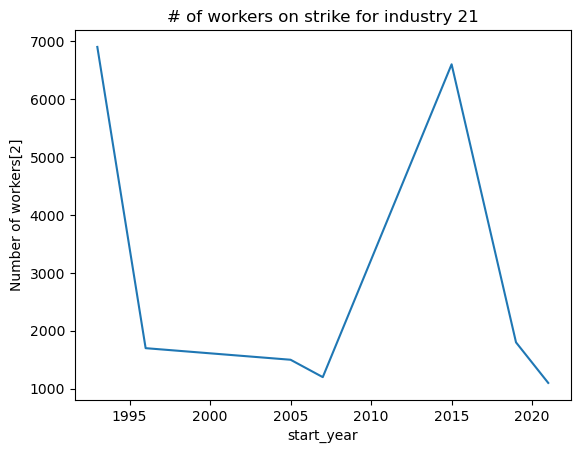

In [40]:
sub_df = grouped_df[grouped_df["NAICS_col"] == "21"]
sns.lineplot(x = sub_df["start_year"], y= sub_df["Number of workers[2]"])
plt.title('# of workers on strike for industry ' + "21");

# for code in grouped_df["NAICS_col"].unique():
#     sub_df = grouped_df[grouped_df["NAICS_col"] == code]
#     sns.lineplot(x = sub_df["start_year"], y= sub_df["Number of workers[2]"])
#     plt.title('# of workers on strike for industry ' + code)
#     plt.figure();

In [14]:
ca_df = bls_df[bls_df["States"].astype(str).str.contains("CA")]
ca_df


,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,NAICS_col,start_year
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN,33,1993.0
8,Kaiser Permanente,CA,Southern,Private industry,62211,Service Employees International Union,SEIU,NaN,NaN,1993-04-01,1993-04-01,12000.0,12000.0,NaN,62,1993.0
9,Vallejo Board of Education,CA,Vallejo,Local government,61111,National Education Association,NEA,NaN,NaN,1993-04-16,1993-04-17,1000.0,2000.0,NaN,61,1993.0
11,"PPG Industries, Inc.","CA, PA",Multiple states,Private industry,32721,"Aluminum, Brick and Glass Workers of America",ABGW,NaN,NaN,1993-05-08,1993-07-14,1600.0,73200.0,"Number of workers involved decreased below 1,0...",32,1993.0
25,Los Angeles Department of Water and Power,CA,Los Angeles County,Local government,22131,International Brotherhood of Electrical Worker...,"IBEW, EAA",NaN,NaN,1993-09-01,1993-09-09,9000.0,54000.0,NaN,22,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Frontier Communications,CA,Southern California,Private industry,517311,Communication Workers of America,CWA,NaN,NaN,2022-08-19,2022-08-24,2000.0,8000.0,NaN,51,2022.0
623,San Francisco International Airport,CA,San Francisco,Local government,722510,"Union of Needletrades, Industrial, and Textile...",UNITE HERE,Local 2,NaN,2022-09-26,2022-09-28,1000.0,3000.0,NaN,72,2022.0
624,Sutter Health Hospitals,CA,Berkeley,Private industry,622110,California Nurses Association/National Nurses ...,CNA/NNU,NaN,NaN,2022-10-24,2022-10-29,1800.0,9000.0,NaN,62,2022.0
625,University of California,CA,Statewide,State government,61131,United Auto Workers,UAW,"Local 2865, 5810",NaN,2022-11-14,2022-12-23,48000.0,1272000.0,"48,000 workers from 11/14-12/11. Number droppe...",61,2022.0


In [15]:
grouped_ca_df = ca_df.groupby(["NAICS_col","start_year"]).mean()
grouped_ca_df = grouped_ca_df.reset_index()
grouped_ca_df

,NAICS_col,start_year,Number of workers[2],"Days idle, cumulative for this work stoppage[3]"
0,21,2015.0,6600.0,322100.0
1,22,1993.0,7500.0,30000.0
2,23,1995.0,3000.0,108000.0
3,23,1999.0,1000.0,2000.0
4,23,2000.0,1200.0,14400.0
...,...,...,...,...
89,92,2013.0,2500.0,2500.0
90,92,2015.0,1900.0,2800.0
91,92,2016.0,1850.0,7200.0
92,92,2017.0,2600.0,9550.0


In [16]:
grouped_ca_df[grouped_ca_df["NAICS_col"] == "21"]

,NAICS_col,start_year,Number of workers[2],"Days idle, cumulative for this work stoppage[3]"
0,21,2015.0,6600.0,322100.0


In [39]:
# for code in grouped_ca_df["NAICS_col"].unique():
#     sub_ca_df = grouped_ca_df[grouped_ca_df["NAICS_col"] == code]
#     sns.lineplot(x = sub_ca_df["start_year"], y= sub_ca_df["Number of workers[2]"])
#     plt.title('# of workers on strike for industry ' + code)
#     plt.figure();

In [41]:
def state_drawer(state, industry=""):
    if state == "":
        state_df= bls_df
    else:
        state_df = bls_df[bls_df["States"].astype(str).str.contains(state)]
    group_df = state_df.groupby(["NAICS_col","start_year"]).mean()
    group_df = group_df.reset_index()
    if industry == "":
        for code in group_df["NAICS_col"].unique():
            sub_df = group_df[group_df["NAICS_col"] == code]
            sns.lineplot(x = sub_df["start_year"], y= sub_df["Number of workers[2]"])
            plt.title('# of workers on strike for industry ' + code)
            plt.figure();
    else:
        sub_df = group_df[group_df["NAICS_col"] == industry]
        sns.lineplot(x = sub_df["start_year"], y= sub_df["Number of workers[2]"])
        plt.title('# of workers on strike for industry ' + industry)
        plt.figure();

# state_drawer("CA")

In [48]:
bls_df_no_nan = bls_df[~bls_df['States'].isna()]
bls_df_no_nan#[~bls_df_no_nan['States'].str.contains(",")].groupby(['States','start_year']).sum()
(bls_df_no_nan['end_year']-bls_df_no_nan['start_year']).sum() + len(bls_df_no_nan['end_year']-bls_df_no_nan['start_year'])


674.0

In [49]:
bls_df_no_nan

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,NAICS_col,start_year,end_year
0,Marine Towing and Transportation Employers' As...,NY,New York,Private industry,488330,International Longshoremen's Association,ILA,NaN,NaN,1988-02-16,1993-12-20,2500.0,2879500.0,"The number of workers decreased to 2,000 in De...",48,1988.0,1993.0
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,21000.0,21000.0,The union name was changed to the Society of P...,33,1993.0,1993.0
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,1000.0,83000.0,"Boston Gas Company also does business as ""Nati...",22,1993.0,1993.0
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,6700.0,103400.0,"Number of workers involved increased from 5,00...",21,1993.0,1993.0
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,6800.0,13600.0,NaN,33,1993.0,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,Sutter Health Hospitals,CA,Berkeley,Private industry,622110,California Nurses Association/National Nurses ...,CNA/NNU,NaN,NaN,2022-10-24,2022-10-29,1800.0,9000.0,NaN,62,2022.0,2022.0
625,University of California,CA,Statewide,State government,61131,United Auto Workers,UAW,"Local 2865, 5810",NaN,2022-11-14,2022-12-23,48000.0,1272000.0,"48,000 workers from 11/14-12/11. Number droppe...",61,2022.0,2022.0
626,The New School,NY,NY,Private industry,61131,Academics Come Together - United Auto Workers,ACT-UAW,Local 7902,NaN,2022-11-16,2022-12-10,1700.0,28900.0,NaN,61,2022.0,2022.0
627,New York Times,NY,NY,Private industry,511110,The NewsGuild,TNG-CWA,NaN,NaN,2022-12-08,2022-12-08,1100.0,1100.0,NaN,51,2022.0,2022.0
